# 텍스트 분석

- 비정형 데이터인 텍스트를 분석하는 것 

: 지금까지 ML 모델은 주어진 정형 데이터 기반에서 모델을 수립하고 예측을 수행. 그리고 머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에 텍스트를 머신러닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는가 하는 것이 매우 중요한 요소 

: 텍스트를 word(또는 word의 일부분) 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하는 것을 '피처 벡터화' 또는 '피처 추출'이라고 함

: 대표적으로 텍스트를 피처 벡터화해서 변환하는 방법에는 BOW와 Word2Vec 방법이 있음

- 텍스트 분석 수행 프로세스 

1. 텍스트 사전 준비작업 (텍스트 전처리): 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어(Word) 등의 토큰화 작업, 의미 없는 단어 (Stop word) 제거 작업, 어근 추출 (Stemming/Lemmatization) 등의 텍스트 정규화 작업을 수행하는 것을 통칭

2. 피처 벡터화/추출: 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당합니다. 대표적인 방법은 BOW와 Word2Vec이 있으며, BOW는 대표적으로 Count 기반과 TF-IDF 기반 벡터화가 있습니다.

3. ML 모델 수립 및 학습/예측/평가: 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행 

## 1. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

- 클렌징 <br>
- 토큰화 <br>
- 필터링/ 스톱 워드 제거/ 철자 수정 <br>
- Stemming <br>
- Lemmatiation <br>

### 문장 토큰화 

문장 토큰화(sentence tokenization)는 문장의 마침표, 개행문자 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적입니다. 또한 정규 표현식에 따른 문장 토큰화도 가능합니다 

In [1]:
from nltk import sent_tokenize
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/ijiseon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
text_sample = "The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes."

sentences = sent_tokenize(text=text_sample)

In [3]:
print(type(sentences), len(sentences))

print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


> sent_tokenize()가 반환하는 것은 각각의 문장으로 구성된 list 객체. 반환된 list 객체가 3개의 문장으로 된 문자열을 가지고 있는 것을 알 수 있습니다.

### 단어 토큰화

단어 토큰화(Word Tokenization)는 문장을 단어로 토큰화하는 것입니다. 기본적을 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리하지만, 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있습니다. 

마침표나 개행 문자와 같이 문장을 분리하는 구분자를 이용해 단어를 토큰화할 수 있으므로 Bag of Word와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분합니다. 일반적으로 문장 토큰화는 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용합니다. 

In [4]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


- sent_tokenize와 word_tokenize를 조합해 문서에 대해서 모든 단어를 토큰화

In [5]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
    
    #문장별로 분리 토큰
    sentences = sent_tokenize(text)
    #분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 3개 문장을 문장별로 먼저 토큰화했으므로 word_tokens 변수는 3개의 리스트 객체를 내포하는 리스트입니다. 그리고 내포된 개별 리스트 객체는 각각 문장별로 토큰화된 단어를 요소로 가지고 있습니다.

<br>

- 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시될 수 밖에 없습니다. 이러한 문제를 조금이라도 해결해보고자 도입 된 것이 n-gram입니다. n-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것입니다. n개 단어 크기 윈도우를 만들어 문장ㅇ의 처음부터 오른쪽으로 움직이면서 토큰화를 수행합니다 <br>
  -> 예를 들어 "Agent Smith knocks the door"를 2-gram(bigram)으로 만들면 (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)와 같이 연속적으로 2개의 단어들을 순차적으로 이동하면서 단어들을 토큰화합니다

### 스톱 워드 제거 

스톱 워드(Stop word)는 분석에 큰 의미가 없는 단어를 지칭. 가령 영어에서 is, the, a, will 등 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어가 이에 해당. 이 단어의 경우 문법적인 특성으로 인해 특히 빈번하게 텍스트에 나타나므로 이것들을 사전에 제거하지 않으면 그 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있습니다. 따라서 이 의미 없는 단어를 제거하는 것이 중요한 전처리 작업입니다.

언어별로 이러한 스톱 워드가 목록화돼 있습니다. NLTK의 경우 가장 다양한 언어의 스톱 워드를 제공합니다. 

In [6]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ijiseon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
print("영어 stop words 개수:", len(nltk.corpus.stopwords.words("english")))
print(nltk.corpus.stopwords.words("english"[:20]))

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words("english")
all_tokens=[]

# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환
        word = word.lower()
        # 토큰화된 개별 단어가 스톱워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    

In [9]:
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


> is, this와 같은 스톱 워드가 필터링을 통해 제거됐음

### Stemming과 Lemmatization

- 많은 언어에서 문법적인 요소에 따라 단어가 다양하게 변합니다. 영어의 경우 과거/현재, 3인칭 단수 여부, 진행형 등 매우 많은 조건에 따라 원래 단어가 변화합니다. 가령 work는 동사 원형인 단어지만 과거형은 worked, 3인칭 단수일 때 works, 진행형인 경우 working 등 다양하게 달라집니다 -> Stemming과 Lemmatization은 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것입니다

- 두 기능 모두 원형 단어를 찾는다는 목적은 유사하지만, Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾습니다. Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있습니다. 이에 반해 Lemmatization은 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줍니다. 따라서 Lemmatization이 Stemming보다 변환에 더 오랜 시간을 필요로 합니다

In [10]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

print(stemmer.stem("working"), stemmer.stem("works"), stemmer.stem("worked"))
print(stemmer.stem("amusing"), stemmer.stem("amuses"), stemmer.stem("amused"))
print(stemmer.stem("happier"), stemmer.stem("happiest"))
print(stemmer.stem("fancier"), stemmer.stem("fanciest"))

work work work
amus amus amus
happy happiest
fant fanciest


> work의 경우 진행형(working), 3인칭 단수(works), 과거형(worked) 모두 기본 단어인 work에 ing, s, ed가 붙는 단순한 변화이므로 원형 단어로 work를 제대로 인식합니다. 하지만 amuse의 경우, 각 변화가 amuse가 아닌 amus에 ing, s, ed가 붙으므로 정확한 단어인 amuse가 아닌 amus를 원형 단어로 인식합니다. 형용사인 happy, fancy의 경우도 비교형, 최상급형으로 변형된 단어의 정확한 원형을 찾지 못하고 원형 단어에서 철자가 다른 어근 단어로 인식하는 경우가 발생합니다

- 일반적으로 Lemmatization은 보다 정확한 원형 단어 추출을 위해 단어의 "품사"를 입력해줘야 함. 다음예제에서 볼 수 있듯이 lemmatize()의 파라미터로 동사의 경우 "v", 형용사의 경우 "a"를 입력합니다

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('omw-1.4')
nltk.download("wordnet")

lemma = WordNetLemmatizer()

print(lemma.lemmatize("amusing","v"), lemma.lemmatize("amuses","v"), lemma.lemmatize("amused","v"))
print(lemma.lemmatize("happier","a"),lemma.lemmatize("happiest","a"))
print(lemma.lemmatize("fancier","a"),lemma.lemmatize("fanciest","a"))

[nltk_data] Downloading package omw-1.4 to /Users/ijiseon/nltk_data...
[nltk_data] Downloading package wordnet to /Users/ijiseon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


## 2. Bag of Words - BOW

Bag of Words 모델은 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델입니다. 문서 내 모든 단어를 한꺼번에 봉투(Bag) 안에 넣은 뒤에 흔들어서 섞는다는 의미로 Bag of Words(BOW) 모델이라고 합니다 (감자튀김이 든 갈색 종이봉투에 후춧가루 같은 양념을 넣고 흔들어서 먹는 이미지와 비슷합니다)

BOW 모델의 장점은 쉽고 빠른 구축에 있습니다. 단순히 단어의 발생 횟수에 기반하고 있지만, 예상보다 문서의 특징을 잘 나타낼 수 있는 모델이어서 전통적으로 여러 분야에서 활용도가 높습니다. 하지만 BOW 기반의 NLP 연구는 여러 가지 제약에 부딪히고 있는데, 대표적인 단점은 다음과 같습니다.


- 문맥 의미(Semantic Context) 반영 부족 <br>
: BOW는 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시됩니다. 물론 이를 보완하기 위해 n_gram 기법을 활용할 수 있지만, 제한적인 부분에 그치므로 언어의 많은 부분을 차지하는 문맥적인 해석을 처리하지 못하는 단점이 있습니다 <br>


- 희소 행렬 문제 (희소성, 희소행렬) <br>
: BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉽습니다. 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어집니다. 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많습니다. 즉, 매우 많은 문서에서 단어의 총 개수는 수만 ~ 수십만 개가 될 수 있는데, 하나의 문서에 있는 단어는  이 중 극히 일부분이므로 대부분의 데이터는 0 값으로 채워지게 됩니다. 이처럼 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬을 희소 행렬(Sparse Matrix)이라고 합니다. 이와는 반대로 대부분의 값이 0이 아닌 의미 있는 값으로 채워져 있는 행렬을 밀집 행렬(Dense Matrix)이라고 합니다. 희소 행렬은 일반적으로 ML 알고리즘의 수행시간과 예측 성능을 떨어뜨리기 때문에 희소 행렬을 위한 특별한 기법이 마련돼 있습니다


### BOW 피처 벡터화

: BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것 <br>
예를 들어, M개의 텍스트 문서가 있고, 이 문서에서 모든 단어를 추출해 나열했을 때 N개의 단어가 있다고 가정하면 문서의 피처 벡터화를 수행하면 M개의 문서는 각각 N개의 값이 할당된 피처의 벡터 세트가 됩니다. 결과적으로 MxN개의 단어 피처로 이뤄진 행렬을 구성하게 됩니다


- 카운트 기반 벡터화 <br>
: 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우 

그러나 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문장에서 자주 사용될 수 밖에 엇는 단어까지 높은 값을 부여하게 됨


- TF-IDF (Term Frequency - inverse Document Frequency) 기반의 벡터화<br>
: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여 

- #### 희소 행렬: COO 형식

: COO 형식은 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장한는 방식. 

예를 들어 [[3,0,1],[0,2,0]]과 같은 2차원 데이터가 있다고 가정. 0이 아닌 데이터는 [3,1,2]이며, 0이 아닌 데이터가 있는 위치를 표시하면 (0,0), (0,2),(1,1)이 됨. 로우와 칼럼을 별도의 배열로 저장하면 [0,0,1]이고 칼럼은[0,2,1]

In [14]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [15]:
from scipy import sparse

data = np.array([3,1,2])

row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [17]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

- #### 희소 행렬: CSR 형식

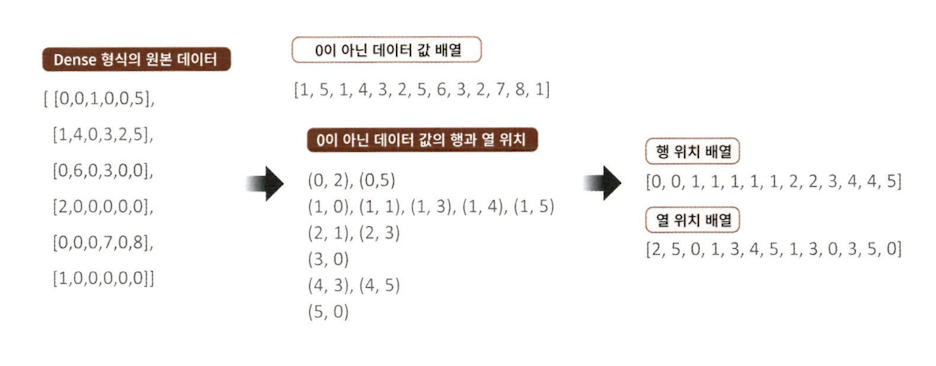

In [22]:
from IPython.display import Image

Image("/Users/ijiseon/Desktop/CSR.png")

행 위치 배열을 주의 깊게 보면 순차적인 같은 값이 반복적으로 나타남을 알 수 있습니다. 즉 0이 2번, 1이 5번이 반복되고 있습니다. 행 위치 배열이 0부터 순차적으로 증가하는 값으로 이뤄졌다는 특성을 고려하면 행 위치 배열의 고유한 값의 시작 위치만 표기하는 방법으로 이러한 반복을 제거할 수 있습니다. (즉 위치의 위치를 표기하는 것입니다)

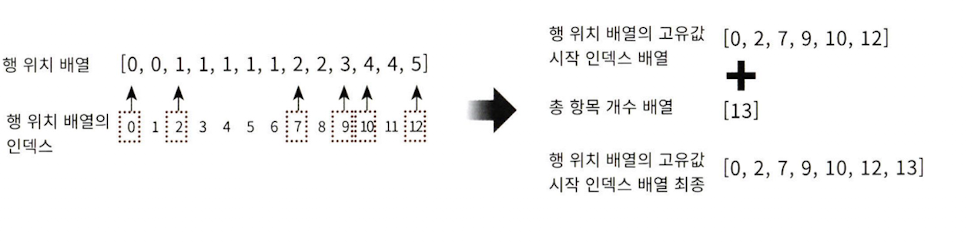

In [23]:
Image("/Users/ijiseon/Desktop/CSR2.png")

In [18]:
from scipy import sparse

dense = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]

])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [19]:

dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]

])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [20]:
coo

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in COOrdinate format>

In [21]:
csr

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>